<a href="https://colab.research.google.com/github/sokrypton/laxy/blob/main/laxy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -qnc https://raw.githubusercontent.com/sokrypton/laxy/main/laxy.py

In [4]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from laxy import *

# LINEAR REGRESSION

In [5]:
x = jnp.arange(10)
y = x*2.0 + 3.0

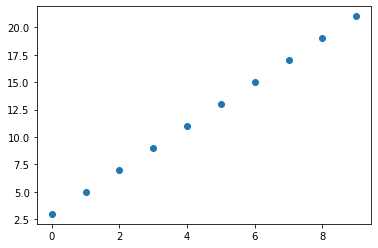

In [6]:
plt.scatter(x,y)

In [7]:
def model(params, inputs):
  y = inputs["x"] * params["m"] + params["b"]
  loss = jnp.square(inputs["y"] - y).sum()
  return loss

In [8]:
inputs = {"x":x, "y":y}
params = {"m":1.0,"b":0.0}

In [9]:
opt = OPT(model, params)

In [10]:
opt.train_on_batch(inputs)

DeviceArray(645., dtype=float32)

In [11]:
losses = []
for n in range(10000):
  loss = opt.train_on_batch(inputs)
  if (n+1) % 100 == 0: 
    losses.append(loss)

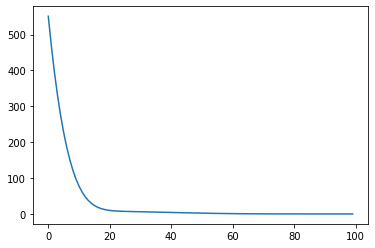

In [12]:
plt.plot(losses)

In [13]:
opt.get_params()

{'b': DeviceArray(2.9996283, dtype=float32),
 'm': DeviceArray(2.000062, dtype=float32)}

In [14]:
opt.get_loss(inputs)

DeviceArray(4.0377205e-07, dtype=float32)

# build a NN using custom layers from laxy
custom layers include: MRF, Conv1D, Conv2D, GRU, Dense

In [42]:
params = {"D0": Dense()(in_dims=10, out_dims=5),
          "D1": Dense()(in_dims=5, out_dims=1),
          "a":1.0}

In [43]:
def model(params, inputs):
  I = inputs["x"]
  D = Dense(params["D0"])(I)
  D = jax.nn.elu(D)
  O = Dense(params["D1"])(D) * params["a"]
  loss = jnp.square(O - inputs["y"]).sum()
  return loss

In [44]:
opt = OPT(model, params)

In [45]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [46]:
losses = []
for n in range(1000):
  loss = opt.train_on_batch(inputs)
  if (n+1) % 100 == 0: 
    losses.append(loss)

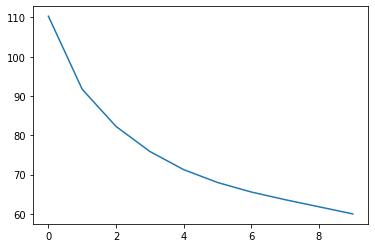

In [47]:
plt.plot(losses)

#STAX

In [48]:
from jax.experimental import stax

In [49]:
stax_layers = stax.serial(stax.Dense(5),
                          stax.Elu,
                          stax.Dense(1))
nn_params, nn_layers = STAX(stax_layers, (None,10))

In [50]:
params = {"nn":nn_params,
          "a":1.0}

In [51]:
def model(params, inputs):
  I = inputs["x"]
  O = nn_layers(params["nn"], I) * params["a"]
  loss = jnp.square(O - inputs["y"]).sum()
  return loss

In [52]:
opt = OPT(model, params)

In [53]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [54]:
losses = []
for n in range(1000):
  loss = opt.train_on_batch(inputs)
  if (n+1) % 100 == 0: 
    losses.append(loss)

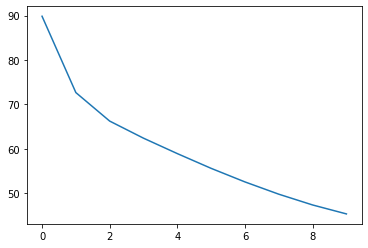

In [55]:
plt.plot(losses)